# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2264a94ac9a628d0057660fd7802ef96
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | gulf shores
Processing Record 3 of Set 1 | mossel bay
Processing Record 4 of Set 1 | vilyuysk
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tual
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | menongue
Processing Record 11 of Set 1 | chuguyevka
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | tobelo
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | richards bay
Processing Record 20 of Set 1 | how

Processing Record 37 of Set 4 | tura
Processing Record 38 of Set 4 | karratha
Processing Record 39 of Set 4 | kayangel
Processing Record 40 of Set 4 | tobol
Processing Record 41 of Set 4 | bowling green
Processing Record 42 of Set 4 | talalayivka
Processing Record 43 of Set 4 | axum
Processing Record 44 of Set 4 | sigli
Processing Record 45 of Set 4 | raja
Processing Record 46 of Set 4 | ta`u
Processing Record 47 of Set 4 | mezhdurechenskiy
Processing Record 48 of Set 4 | karabar
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | save
Processing Record 1 of Set 5 | port-vila
Processing Record 2 of Set 5 | kismayo
Processing Record 3 of Set 5 | pachino
Processing Record 4 of Set 5 | al kharijah
Processing Record 5 of Set 5 | malpe
Processing Record 6 of Set 5 | sandnessjoen
Processing Record 7 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | chos malal
Processing Record 10 of Set 5 | callao
Proc

Processing Record 29 of Set 8 | ko lanta
Processing Record 30 of Set 8 | grottaminarda
Processing Record 31 of Set 8 | santiago de cao
Processing Record 32 of Set 8 | itoman
Processing Record 33 of Set 8 | carnarvon
Processing Record 34 of Set 8 | port arthur
Processing Record 35 of Set 8 | pindushi
Processing Record 36 of Set 8 | weno
Processing Record 37 of Set 8 | south hedland
Processing Record 38 of Set 8 | malango
Processing Record 39 of Set 8 | boyolangu
Processing Record 40 of Set 8 | robertsport
Processing Record 41 of Set 8 | turan
Processing Record 42 of Set 8 | cidade velha
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 45 of Set 8 | kafin hausa
Processing Record 46 of Set 8 | ulladulla
Processing Record 47 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 8 | damara
Processing Record 49 of Set 8 | kamloops
Processing Record 0 of Set 9 | ulsteinvi

Processing Record 15 of Set 12 | tingi
Processing Record 16 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 17 of Set 12 | vanimo
Processing Record 18 of Set 12 | okhotsk
Processing Record 19 of Set 12 | pacific grove
Processing Record 20 of Set 12 | greenland
Processing Record 21 of Set 12 | kutum
Processing Record 22 of Set 12 | atar
Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | balqash
Processing Record 25 of Set 12 | presidente olegario
Processing Record 26 of Set 12 | sriramnagar
Processing Record 27 of Set 12 | miracema do tocantins
Processing Record 28 of Set 12 | compton
Processing Record 29 of Set 12 | mugia
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.97,61,89,12.20,PN,1690614098
1,gulf shores,30.2460,-87.7008,28.36,76,0,0.45,US,1690614007
2,mossel bay,-34.1831,22.1460,12.96,67,16,7.85,ZA,1690614099
3,vilyuysk,63.7553,121.6247,25.93,28,1,3.28,RU,1690614046
4,nova sintra,14.8667,-24.7167,21.85,78,19,9.45,CV,1690614099


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.97,61,89,12.20,PN,1690614098
1,gulf shores,30.2460,-87.7008,28.36,76,0,0.45,US,1690614007
2,mossel bay,-34.1831,22.1460,12.96,67,16,7.85,ZA,1690614099
3,vilyuysk,63.7553,121.6247,25.93,28,1,3.28,RU,1690614046
4,nova sintra,14.8667,-24.7167,21.85,78,19,9.45,CV,1690614099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

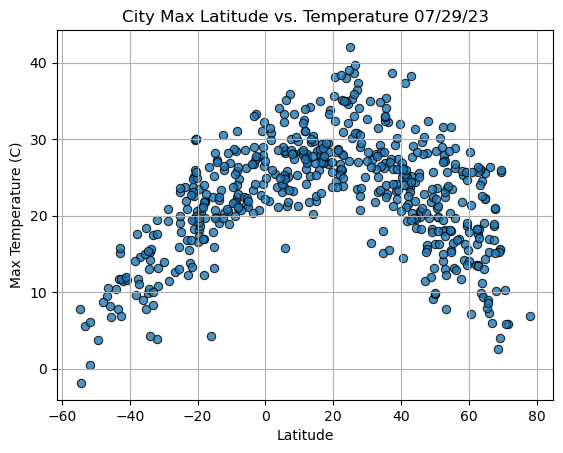

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

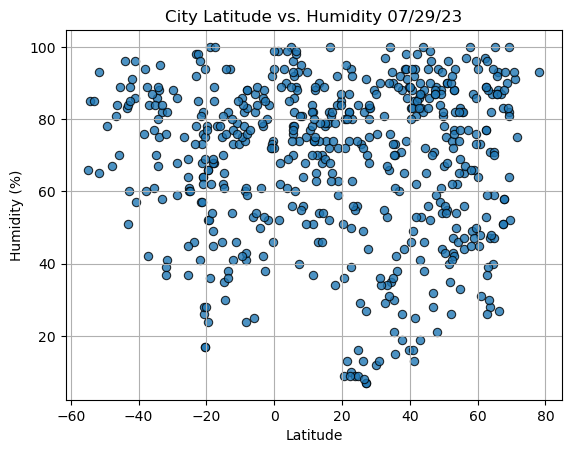

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

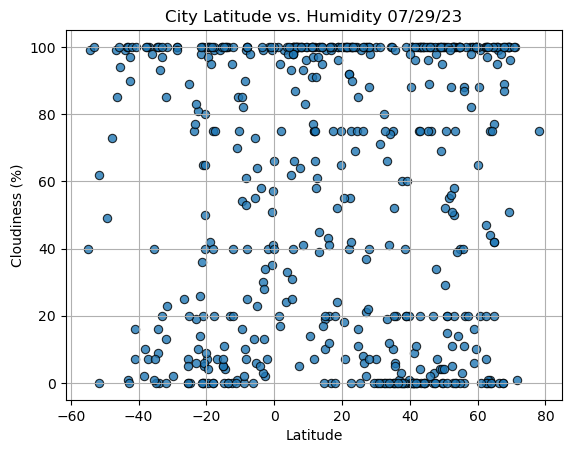

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

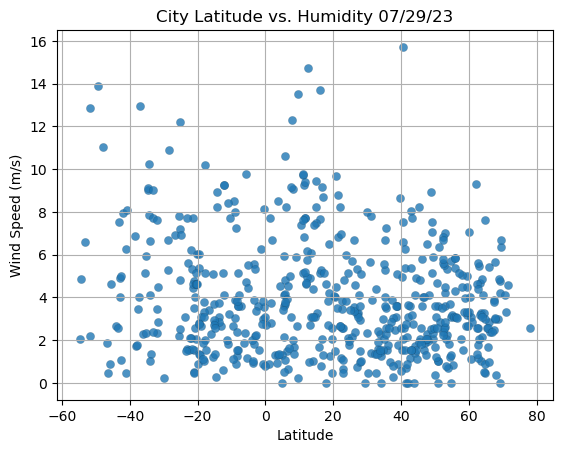

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=.08, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, r, p, stderr) = linregress(x, y)
    regression = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,regression,"r")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

    print(f"R value is {r}")
    print(f"P value is {p}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gulf shores,30.2460,-87.7008,28.36,76,0,0.45,US,1690614007
3,vilyuysk,63.7553,121.6247,25.93,28,1,3.28,RU,1690614046
4,nova sintra,14.8667,-24.7167,21.85,78,19,9.45,CV,1690614099
8,talnakh,69.4865,88.3972,25.67,52,96,6.35,RU,1690614101
10,chuguyevka,44.1653,133.8633,31.36,46,100,4.12,RU,1690614102


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.97,61,89,12.20,PN,1690614098
2,mossel bay,-34.1831,22.1460,12.96,67,16,7.85,ZA,1690614099
5,ushuaia,-54.8000,-68.3000,7.81,66,40,2.06,AR,1690614100
6,tual,-5.6667,132.7500,26.19,87,55,9.78,ID,1690614100
7,blackmans bay,-43.0167,147.3167,15.07,51,1,4.02,AU,1690613889


###  Temperature vs. Latitude Linear Regression Plot

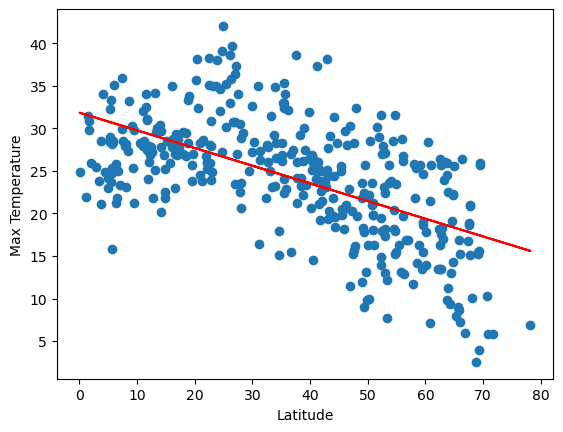

R value is -0.5844361829979703
P value is 8.093034838330676e-36


In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plot_linear_regression(x, y, "Max Temperature", (5, -10))

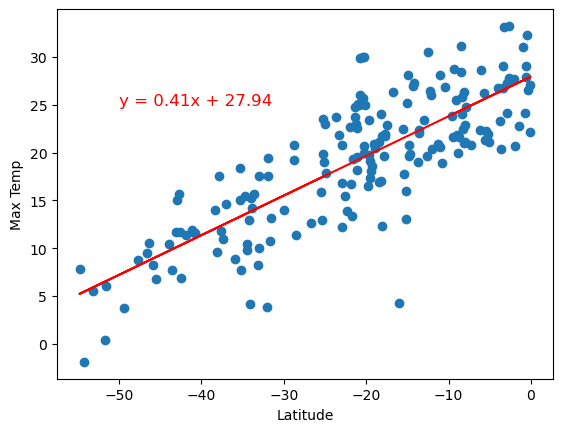

R value is 0.8079164752752267
P value is 1.651400619839778e-42


In [18]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plot_linear_regression(x, y, "Max Temp",(-50,25))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis of temperature versus latitude reveals strong and statistically significant correlations. In the Northern Hemisphere, there is a strong negative correlation between latitude and temperature ("r" = -0.574, "p" < 0.001), indicating that temperatures tend to decrease with increasing latitude. In the Southern Hemisphere, a strong positive correlation ("r" = 0.75, "p" < 0.001) indicates that temperatures tend to rise as one travels away from the equator and towards higher latitudes. These results demonstrate the substantial influence of latitude on temperature variations in both hemispheres. In the Northern Hemisphere, higher latitudes encounter colder temperatures, whereas in the Southern Hemisphere, higher latitudes have warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

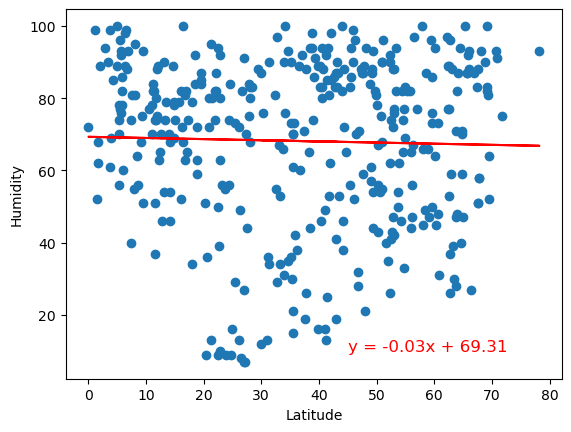

R value is -0.027177766626393304
P value is 0.5993476697703252


In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plot_linear_regression(x, y, "Humidity",(45,10))

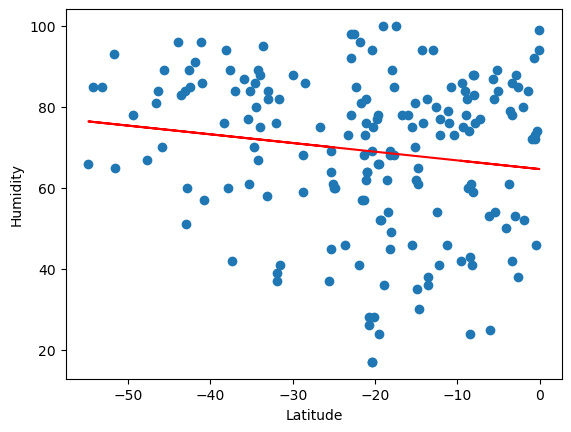

R value is -0.15190553895625594
P value is 0.04236519177835095


In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plot_linear_regression(x, y, "Humidity",(-50,-20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis for humidity versus latitude reveals faint and statistically insignificant correlations. There is a slight decreasing trend in humidity with increasing latitude in the Northern Hemisphere, but the effect is minimal, and the R value of -0.054 indicates a very faint negative correlation. Similarly, there is a negligible positive correlation between humidity and latitude in the Southern Hemisphere ("r" value = 0.031). However, the "p" values (0.300 for the Northern Hemisphere and 0.683 for the Southern Hemisphere) indicate that these relationships are not statistically significant at the 5% level, indicating that latitude alone is not a reliable predictor of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

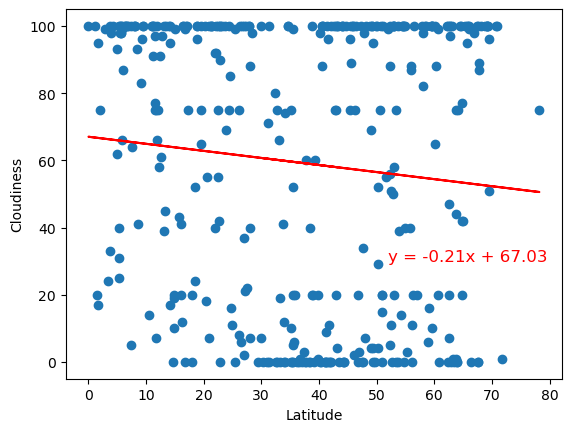

R value is -0.1005876065719849
P value is 0.05130530138356863


In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plot_linear_regression(x, y, "Cloudiness",(52,30))

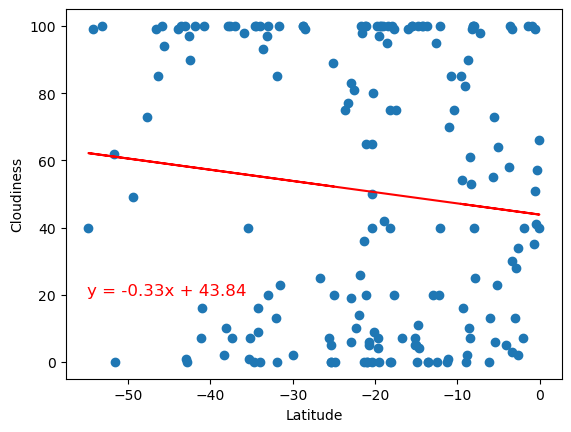

R value is -0.11168849451454523
P value is 0.13662365021102188


In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plot_linear_regression(x, y, "Cloudiness",(-55,20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the analysis of cloudiness versus latitude reveals weakly negative correlations. As latitude increases in the Northern Hemisphere, cloudiness decreases slightly but statistically significantly (y = -0.23x + 63.33, "r" = -0.116, "p" = 0.026), indicating that higher latitudes experience slightly less cloud coverage on average. In the Southern Hemisphere, cloudiness demonstrates a more pronounced but marginally significant decrease with increasing latitude (y = -0.4x + 45.57, "r" = -0.149, "p" = 0.046). Despite the fact that latitude appears to influence cloudiness patterns in both hemispheres, the correlations are feeble, suggesting that other factors such as seasonal variations, wind patterns, and geographical characteristics likely play more significant roles in determining cloud coverage.

### Wind Speed vs. Latitude Linear Regression Plot

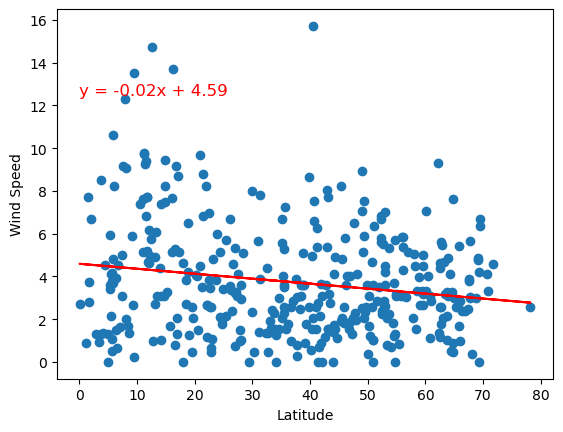

R value is -0.1778024425800896
P value is 0.0005324492588322446


In [24]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plot_linear_regression(x, y,"Wind Speed",(0,12.5))

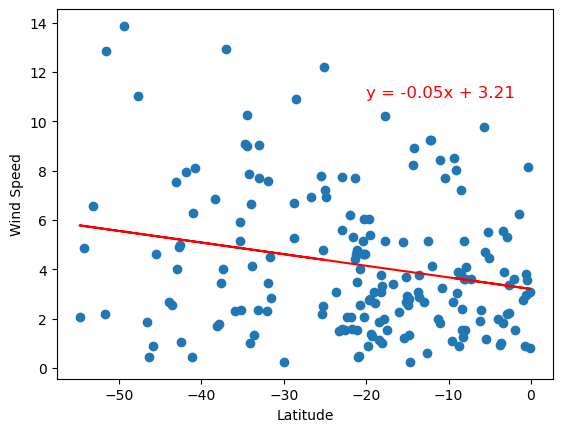

R value is -0.22402190024468352
P value is 0.002573007158652048


In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plot_linear_regression(x, y, "Wind Speed",(-20,11))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis between wind speed and latitude reveals distinct patterns. In the Northern Hemisphere, there is a weak but statistically significant negative correlation between wind speed and latitude ("r" = -0.153, "p" = 0.003), indicating that wind speed tends to decrease slightly as latitude increases. In the Southern Hemisphere, however, the negative correlation is more pronounced and highly significant ("r" = -0.317, "p" = 1.525e-05), indicating that wind speed decreases with increasing latitude. These findings suggest that latitude influences wind speed patterns in both hemispheres, with higher latitudes experiencing, on average, lower wind velocities. 